In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
import numpy as np
from nltk import word_tokenize
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt

##You may import any other module if required

Using TensorFlow backend.


In [4]:
df=pd.read_csv("news_summary.csv",encoding = "ISO-8859-1")
columns=df.columns
new_df=df[['ctext','text']]
#print(df.describe())
#print(new_df.head())
#print("Description:",new_df['ctext'][0])
#print("Summary:",new_df['text'][0])
new_df.to_csv("summary.csv",encoding = "ISO-8859-1")

In [5]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}



In [6]:
df=pd.read_csv("summary.csv",encoding = "ISO-8859-1")
columns=df.columns




#An example showing the data and the summary
#print("Text:",X[1])
#print("\n")
#print("Summary:",y[1])
#Text cleaning
#Rows having duplicates will be omitted
df.drop_duplicates(keep='first',inplace=True)

#Rows not having summary or document is deleted
df.dropna(axis=0,inplace=True)
X=df['ctext']
y=df['text']

In [7]:
#Splitting the dataset to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [8]:
def dataset_cleaning():
    stop_words = set(stopwords.words('english')) 
    def text_cleaner(text):
        newString = text.lower()
        newString = BeautifulSoup(newString, "lxml").text
        newString = re.sub(r'\([^)]*\)', '', newString)
        newString = re.sub('"','', newString)
        newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
        newString = re.sub(r"'s\b","",newString)
        newString = re.sub("[^a-zA-Z]", " ", newString) 
        tokens = [w for w in newString.split() if not w in stop_words]
        long_words=[]
        for i in tokens:
            if len(i)>=3:                  #removing short word
                long_words.append(i)   
        return (" ".join(long_words)).strip()

    cleaned_text = []
    for t in df['ctext']:
        cleaned_text.append(text_cleaner(t))
    print('done')

    def summary_cleaner(text):
        newString = re.sub('"','', text)
        newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
        newString = re.sub(r"'s\b","",newString)
        newString = re.sub("[^a-zA-Z]", " ", newString)
        newString = newString.lower()
        tokens=newString.split()
        newString=''
        for i in tokens:
            if len(i)>1:                                 
                newString=newString+i+' '  
        return newString

    #Call the above function
    cleaned_summary = []
    for t in df['text']:
        cleaned_summary.append(summary_cleaner(t))
    

    df['cleaned_text']=cleaned_text
    df['cleaned_summary']=cleaned_summary
    df['cleaned_summary'].replace('', np.nan, inplace=True)
    df.dropna(axis=0,inplace=True)

In [9]:
dataset_cleaning()

done


In [166]:
def preprocessing():
    #This function  will be used to preprocess the data to a form that can be fed into the neural network
    #Subparts:
    ##1.Find the most_probable_length of the sentences of text_type and summary type 
    ##(Hint: you may plot the distribution of lengths of sentences)
    text_count = []
    summary_count = []

    for t in df['cleaned_text']:
        text_count.append(len(t.split()))
    for t in df['cleaned_summary']:
        summary_count.append(len(t.split()))
      
    graph_df= pd.DataFrame()
    graph_df['text']=text_count
    df2=pd.DataFrame()
  # graph_df['summary']=summary_count
    df2['summary']=summary_count
    graph_df.hist(bins = 5,range = [0,600])
    df2.hist(bins = 5,range = [50,63])
    plt.show()
    
    

    ##2.Tokenizing the data
    ##3.Padding the sentences to a specific length
    ##4.Introducing embeddings( We'll be using the Fasttext embeddings)
    

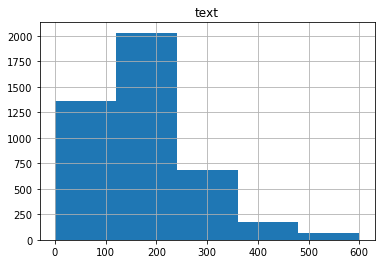

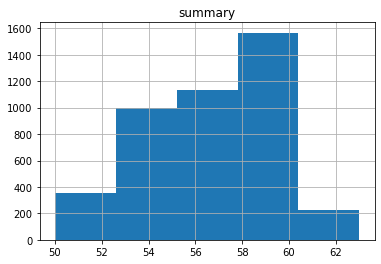

In [167]:
preprocessing()

In [168]:
cnt=0
for i in df['cleaned_summary']:
    if(len(i.split())<=63):
        cnt=cnt+1
print(cnt/len(df['cleaned_summary']))
max_sum_len=63
cnt=0
for i in df['cleaned_text']:
    if(len(i.split())<600):
        cnt=cnt+1
print(cnt/len(df['cleaned_text']))
max_text_len=600

0.9977252047315741
0.9818016378525932


In [114]:
def model():
    #This function defines the structure  of the model , i.e the number of hidden units, no. of layers
    #and the input and output dimensions of each layer.(We'll be using keras)
    pass

In [16]:
def model_accuracy():
    #Function to check how the model works on the test data
    pass

In [17]:
def predict():
    #This function will interact with the user in taking whole texts and will return it's summary as output
    pass